In [1]:
import pandas as pd
import numpy as np
import os
# from sage.symbolic.substitution_map import make_map
#import sympy as sp
from sympy import *
import matplotlib.pyplot as plt
%matplotlib inline
from plotly import graph_objects as go
import plotly.express as px
from IPython.display import Image
import seaborn as sns
sns.set(font='Franklin Gothic Book',
        rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
 'axes.facecolor': 'None',
 'axes.grid': False,
 'grid.color':'#D5D5D5',
 'axes.labelcolor': 'dimgrey',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': '#FEFCFB',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'dimgrey',
 'xtick.bottom': False,
 'xtick.color': 'dimgrey',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'dimgrey',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False})
sns.set_context("notebook", rc={"font.size":16,
                                "axes.titlesize":20,
                                "axes.labelsize":18})

def area(diam, num):
    return num*pi*diam**2 /4

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [509]:
NEd = 100*10**3
MEd = 20*10**6
As = area(18,6)
A1s = area(18,2)
b = 350
d = 310
d1 = 40
d2 = 40
h = d+d1
delta2 = d2/d
delta1 = d1/d
#--------------------------
fck = 25
gammac = 1.5
alphacc = .85
fcd = alphacc*fck/gammac
epsilonc2 = 2/1000
epsiloncu = 3.5/1000
fcm = fck + 8
Ecm = 22000 * (fcm/10)**.3
#-----------------------------
fyk = 450
gammas = 1.15
fyd = fyk/gammas
Es = 210000
epsilonse = fyd/Es
epsilonsu = 10/1000
#--------------------------
psi, mylambda, xi, sigmas, sigma1s = symbols('psi, lambda, xi, sigmas, sigma1s')
#------------------------------
psi3 = .80952
lambda3 = .416
#---
# psi2 = (xi/(1-xi))*(epsilonsu/(3*epsilonc2**2))*(3*epsilonc2 - xi/(1-xi) * epsilonsu)
def psi2(xi):
    return (xi/(1-xi))*(epsilonsu/(3*epsilonc2**2))*(3*epsilonc2 - xi/(1-xi) * epsilonsu)
# lambda2 = (4*epsilonc2 - epsilonsu*xi/(1-xi))/(4*(3*epsilonc2-epsilonsu*xi/(1-xi)))
def lambda2(xi):
    return (4*epsilonc2 - epsilonsu*xi/(1-xi))/(4*(3*epsilonc2-epsilonsu*xi/(1-xi)))
#---
def psi2u(xi):
    return 1-1/3 * epsilonc2/epsilonsu * (1-xi)/xi
def lambda2u(xi):
    return ((6*epsilonsu**2 + 4*epsilonsu*epsilonc2 + epsilonc2**2)*xi**2 - 2*epsilonc2**2 * xi + epsilonc2**2 -4*epsilonsu*epsilonc2*xi)/(4*epsilonsu*xi*((3*epsilonsu + epsilonc2)*xi - epsilonc2))
#---
def psi6(xi):
    return (xi**2 - 6*xi/7 + 125/1029)/((xi -3/7)**2)
def lambda6(xi):
    return 3/14 * (2401*xi**2 - 2058*xi + 185)/(1029*xi**2 - 882*xi + 125)
#-------------
xi1a1b = (epsilonsu*delta2 - epsilonse)/(epsilonsu-epsilonse)
xi2a2b = (epsilonsu*delta2 + epsilonse)/(epsilonsu + epsilonse)
xi2b3 = epsiloncu/(epsiloncu+epsilonsu)
xi3a3b = epsiloncu*delta2/(epsiloncu-epsilonse)
xi3b4 = epsiloncu/(epsiloncu+epsilonse)
xi45 = 1
xi56 = h/d
t = h*(epsiloncu-epsilonc2)/epsiloncu
xi6a6b = (epsilonc2 + epsilonse*t/d)/(epsilonc2-epsilonse)
#-----------lunghezza domini xi---------------



(array([], dtype=int64),)

In [577]:
xi = np.arange(-1,1,10**(-5))
lun = len(xi)
NRd = MRd = np.zeros(lun)
for i in range (lun):
    if xi[i] <=xi1a1b:
        NRd[i] = -(As*fyd + A1s * fyd)
        MRd[i] = As*fyd*(h/2 - d1)-  A1s*fyd*(h/2 -d2)
    if xi[i] >= xi1a1b and xi[i] <= 0:
        NRd[i] = -(As*fyd + A1s*Es*epsilonsu/(d-xi[i]*d) * (d2-xi[i]*d))
        MRd[i] =  As*fyd*(h/2 - d1) -  A1s*Es*epsilonsu/(d-xi[i]*d) * (d2 - xi[i]*d)*(h/2 - d2)
    if xi[i] >= 0 and xi[i] <= xi2a2b:
        if xi[i]/(1-xi[i]) * epsilonsu < (epsilonc2):
            NRd[i] = b*psi2(xi[i])*xi[i]*d*fcd + A1s*Es*epsilonsu/(d-xi[i]*d) *(xi[i]*d - d2) -As*fyd
            MRd[i] = b*psi2(xi[i])*xi[i]*d*fcd*(h/2 - lambda2(xi[i])*xi[i]*d) + A1s*Es*epsilonsu/(d-xi[i]*d) *(xi[i]*d - d2)*(h/2 - d2) + As*fyd*(h/2 - d1)
        if xi[i]/(1-xi[i]) * epsilonsu > (epsilonc2) and xi[i]/(1-xi[i]) * epsilonsu < (epsiloncu):
            NRd[i] = (b*psi2u(xi[i])*xi[i]*d*fcd + A1s*Es*epsilonsu/(d-xi[i]*d) *(xi[i]*d - d2) -As*fyd)
            MRd[i] = b*psi2u(xi[i])*xi[i]*d*fcd*(h/2 - lambda2u(xi[i])*xi[i]*d) + A1s*Es*epsilonsu/(d-xi[i]*d) *(xi[i]*d - d2)*(h/2 - d2) + As*fyd*(h/2 - d1)
    if xi[i] >= xi2a2b and xi[i] <= xi2b3:
        if xi[i]/(1-xi[i]) * epsilonsu < (epsilonc2):
            NRd[i] = (b*psi2(xi[i])*xi[i]*d*fcd + A1s*fyd -As*fyd)
            MRd[i] = b*psi2(xi[i])*xi[i]*d*fcd*(h/2 - lambda2(xi[i])*xi[i]*d) + A1s*fyd*(h/2 - d2) + As*fyd*(h/2 - d1)
        if xi[i]/(1-xi[i]) * epsilonsu > (epsilonc2) and xi[i]/(1-xi[i]) * epsilonsu < (epsiloncu):
            NRd[i] = (b*psi2u(xi[i])*xi[i]*d*fcd + A1s*fyd -As*fyd)
            MRd[i] = b*psi2u(xi[i])*xi[i]*d*fcd*(h/2 - lambda2u(xi[i])*xi[i]*d) + A1s*fyd*(h/2 - d2) + As*fyd*(h/2 - d1)
    if xi[i] >= xi2b3 and xi[i] <= xi3a3b:
        NRd[i] = b*psi3*xi[i]*d*fcd + A1s*Es*epsiloncu*(xi[i]*d-d2)/(xi[i]*d) - As*fyd
        MRd[i] = b*psi3*xi[i]*d*fcd*(h/2 - lambda3*xi[i]*d) + A1s*Es*epsiloncu*(xi[i]*d-d2)/(xi[i]*d)*(h/2 - d2) + As*fyd*(h/2 - d1)


KeyboardInterrupt: 

In [585]:
abs(floor(xi1a1b*10**5))

7043

In [590]:
xi = np.arange(-1,1,10**(-5))
lun = len(xi)
NRd = MRd = np.zeros(lun)
for i in range (0, abs(floor(xi1a1b*10**5))):
    NRd[i] = -(As*fyd + A1s * fyd)
    MRd[i] = As*fyd*(h/2 - d1)-  A1s*fyd*(h/2 -d2)
for i in range (abs(floor(xi1a1b*10**5)), 10**5):
    NRd[i] = -(As*fyd + A1s*Es*epsilonsu/(d-xi[i]*d) * (d2-xi[i]*d))
    MRd[i] =  As*fyd*(h/2 - d1) -  A1s*Es*epsilonsu/(d-xi[i]*d) * (d2 - xi[i]*d)*(h/2 - d2)
for i in range (10**5, floor(xi2a2b*10**5)):
    if xi[i]/(1-xi[i]) * epsilonsu < (epsilonc2):
        NRd[i] = b*psi2(xi[i])*xi[i]*d*fcd + A1s*Es*epsilonsu/(d-xi[i]*d) *(xi[i]*d - d2) -As*fyd
        MRd[i] = b*psi2(xi[i])*xi[i]*d*fcd*(h/2 - lambda2(xi[i])*xi[i]*d) + A1s*Es*epsilonsu/(d-xi[i]*d) *(xi[i]*d - d2)*(h/2 - d2) + As*fyd*(h/2 - d1)
    if xi[i]/(1-xi[i]) * epsilonsu > (epsilonc2) and xi[i]/(1-xi[i]) * epsilonsu < (epsiloncu):
        NRd[i] = (b*psi2u(xi[i])*xi[i]*d*fcd + A1s*Es*epsilonsu/(d-xi[i]*d) *(xi[i]*d - d2) -As*fyd)
        MRd[i] = b*psi2u(xi[i])*xi[i]*d*fcd*(h/2 - lambda2u(xi[i])*xi[i]*d) + A1s*Es*epsilonsu/(d-xi[i]*d) *(xi[i]*d - d2)*(h/2 - d2) + As*fyd*(h/2 - d1)
for i in range (floor(xi2a2b*10**5), floor(xi2b3*10**5)):
    if xi[i]/(1-xi[i]) * epsilonsu < (epsilonc2):
        NRd[i] = (b*psi2(xi[i])*xi[i]*d*fcd + A1s*fyd -As*fyd)
        MRd[i] = b*psi2(xi[i])*xi[i]*d*fcd*(h/2 - lambda2(xi[i])*xi[i]*d) + A1s*fyd*(h/2 - d2) + As*fyd*(h/2 - d1)
    if xi[i]/(1-xi[i]) * epsilonsu > (epsilonc2) and xi[i]/(1-xi[i]) * epsilonsu < (epsiloncu):
        NRd[i] = (b*psi2u(xi[i])*xi[i]*d*fcd + A1s*fyd -As*fyd)
        MRd[i] = b*psi2u(xi[i])*xi[i]*d*fcd*(h/2 - lambda2u(xi[i])*xi[i]*d) + A1s*fyd*(h/2 - d2) + As*fyd*(h/2 - d1)
for i in range (floor(xi2b3*10**5), floor(xi3a3b*10**5)):
    NRd[i] = b*psi3*xi[i]*d*fcd + A1s*Es*epsiloncu*(xi[i]*d-d2)/(xi[i]*d) - As*fyd
    MRd[i] = b*psi3*xi[i]*d*fcd*(h/2 - lambda3*xi[i]*d) + A1s*Es*epsiloncu*(xi[i]*d-d2)/(xi[i]*d)*(h/2 - d2) + As*fyd*(h/2 - d1)


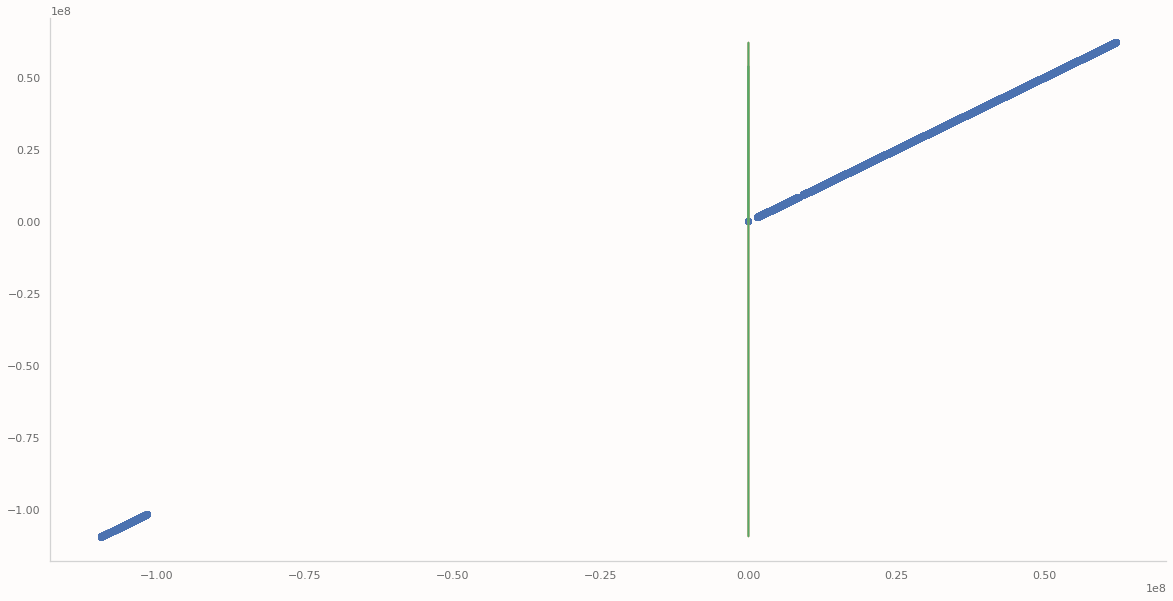

In [592]:
plt.figure(figsize=(20,10))
plt.plot(NRd, MRd, 'o')
plt.plot(xi, NRd)
plt.plot(xi, MRd)

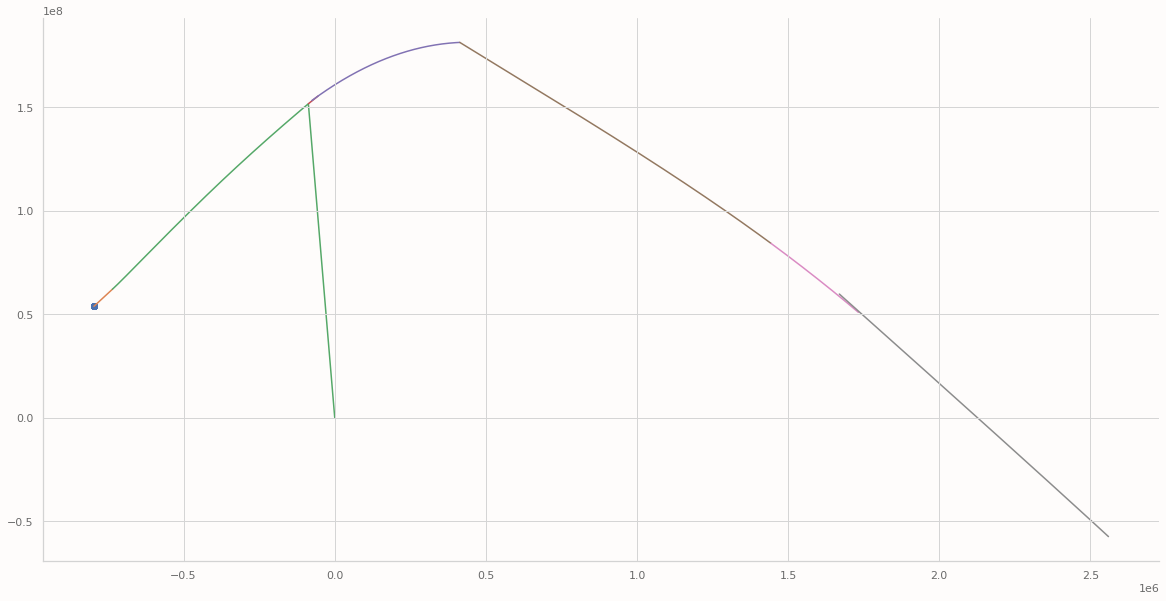

In [485]:
plt.figure(figsize=(20,10))
plt.plot(NRd1a, MRd1a,'o')
plt.plot(NRd1b, MRd1b,)
plt.plot(NRd2a, MRd2a)
# plt.plot(NRd2b, MRd2b)
plt.plot(NRd3a, MRd3a)
plt.plot(NRd3b, MRd3b)
plt.plot(NRd4, MRd4)
plt.plot(NRd5, MRd5)
plt.plot(NRd6a, MRd6a)
# plt.plot(NRd6b, MRd6b)
plt.grid('True')
